#Open CV Tutorial

In [4]:
import PIL

In [5]:
import cv2
import tensorflow as tf
import os
from PIL import Image
print(tf.__version__)

2.5.0


In [6]:
gpus  = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
image_exts  = ['jpeg', 'jpg', 'bmp', 'png']

#Remove unavaiable file type

In [8]:
for image_class in os.listdir('data'):
    for image in os.listdir(os.path.join('data', image_class)):
        image_path = os.path.join('data', image_class, image)
        try:
            with Image.open(image_path) as img:
                if img.format.lower() not in image_exts:
                    print(image_path, " is not in format")
        except Exception as e:
            print(e)

In [9]:
img = cv2.imread(os.path.join('data','cats_data', '_4e6b287.jpg'))

In [10]:
print(img.shape)

(2560, 1920, 3)


In [11]:
from matplotlib import pyplot as plt

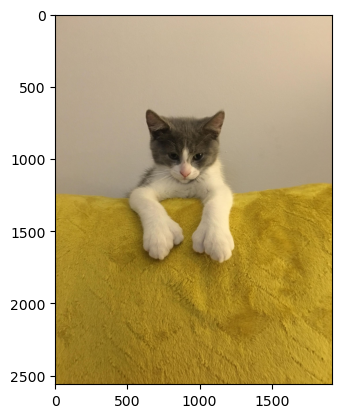

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Load the data

In [68]:
data = tf.keras.preprocessing.image_dataset_from_directory('data', batch_size=8)

Found 46 files belonging to 2 classes.


In [27]:
iterator = data.as_numpy_iterator()

In [35]:
batch = iterator.next()

In [36]:
batch

(array([[[[126.       , 124.       ,  99.       ],
          [115.5      , 113.5      ,  88.5      ],
          [101.5625   ,  99.5625   ,  74.5625   ],
          ...,
          [163.75     , 164.75     ,  96.75     ],
          [156.8125   , 157.8125   ,  89.8125   ],
          [152.       , 153.       ,  85.       ]],
 
         [[125.5625   , 123.5625   ,  98.5625   ],
          [115.25391  , 113.25391  ,  88.25391  ],
          [101.58984  ,  99.58984  ,  74.58984  ],
          ...,
          [162.84766  , 163.84766  ,  95.84766  ],
          [156.1836   , 157.1836   ,  89.18359  ],
          [151.5625   , 152.5625   ,  84.5625   ]],
 
         [[124.9375   , 122.9375   ,  97.9375   ],
          [114.90234  , 112.90234  ,  87.90234  ],
          [101.63281  ,  99.63281  ,  74.63281  ],
          ...,
          [161.6211   , 162.6211   ,  94.74609  ],
          [155.34766  , 156.34766  ,  88.47266  ],
          [151.       , 152.       ,  84.125    ]],
 
         ...,
 
         [[ 

In [37]:
batch[0].shape

(8, 256, 256, 3)

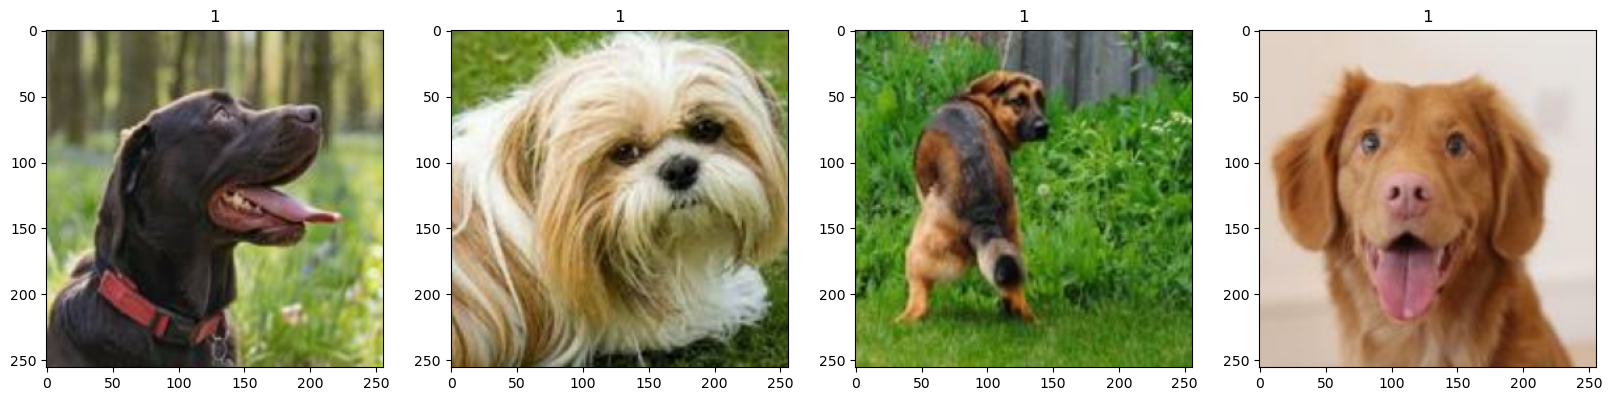

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    
    ax[index].set_title(batch[1][index])
#1 = dog , 0 = cat

Preprocess data

In [69]:
data = data.map(lambda x, y: (x/255, y))

In [70]:
scaled_iterator = data.as_numpy_iterator()

In [71]:
batch = scaled_iterator.next()
print(batch)

(array([[[[0.95686275, 0.91764706, 0.32941177],
         [0.95686275, 0.91764706, 0.3139706 ],
         [0.95759803, 0.91813725, 0.2904412 ],
         ...,
         [0.8862745 , 0.9004902 , 0.7105392 ],
         [0.8625    , 0.88259804, 0.660049  ],
         [0.84705883, 0.87058824, 0.627451  ]],

        [[0.9362745 , 0.9022059 , 0.3139706 ],
         [0.93852633, 0.9029565 , 0.30078125],
         [0.9423713 , 0.90462625, 0.28046876],
         ...,
         [0.8893842 , 0.9037071 , 0.71182597],
         [0.8649663 , 0.88506436, 0.65983456],
         [0.8487745 , 0.8723039 , 0.6257353 ]],

        [[0.90563726, 0.87892157, 0.29093137],
         [0.91056985, 0.88053   , 0.28053004],
         [0.91812193, 0.88359374, 0.26427695],
         ...,
         [0.89428616, 0.9085172 , 0.71366423],
         [0.8691176 , 0.8889706 , 0.6598039 ],
         [0.8519608 , 0.8752451 , 0.6237745 ]],

        ...,

        [[0.5470588 , 0.610049  , 0.33186275],
         [0.5504902 , 0.6065104 , 0.34044117

In [76]:
batch[0].max() ,batch[0].min()

(1.0, 0.0)

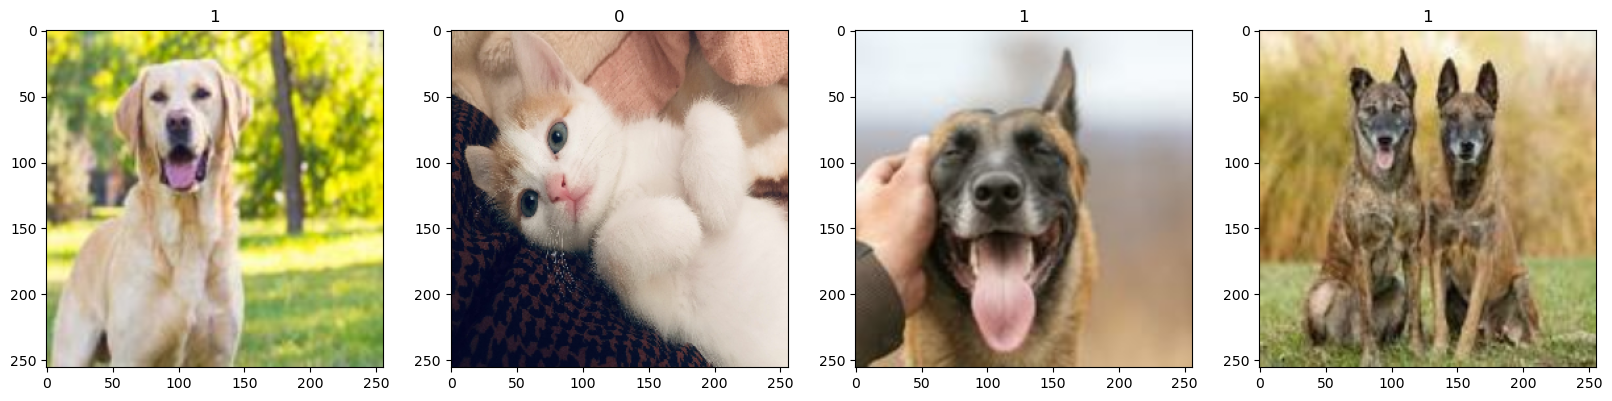

In [72]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img)
    
    ax[index].set_title(batch[1][index])

In [97]:
train_size = int(len(data) * .7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) 

In [98]:
batch[0].shape

(8, 256, 256, 3)

## CNN 

In [87]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [99]:
model = Sequential()

In [100]:
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [102]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

# Train

In [106]:
logs = 'logs'
tensorboard_callbck = tf.keras.callbacks.TenorBoard(log_dir=logdir)

AttributeError: module 'tensorflow.keras.callbacks' has no attribute 'TenorBoard'